In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("NationalNames.csv")

In [3]:
data.shape

(1825433, 5)

In [4]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [5]:
data['Name'].nunique()

93889

In [6]:
data['Gender'] = data['Gender'].astype('category').cat.codes

In [7]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,0,7065
1,2,Anna,1880,0,2604
2,3,Emma,1880,0,2003
3,4,Elizabeth,1880,0,1939
4,5,Minnie,1880,0,1746


In [8]:
df = data.groupby('Name').mean()['Gender'].reset_index()

In [9]:
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [10]:
df['Gender'] = df['Gender'].astype('int')
df

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1
...,...,...
93884,Zytavious,1
93885,Zyvion,1
93886,Zyyanna,0
93887,Zyyon,1


In [11]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [12]:
import string

In [13]:
letters = list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [14]:
vocab = dict(zip(letters, range(1, 27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [15]:
r_vocab = dict(zip(range(1, 27), letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [16]:
def word_to_number():
  for i in range(0, df.shape[0]):
    seq = [vocab [letters.lower()] for letters in df['Name'][i] ]
    df['Name'][i] = seq

In [17]:
word_to_number()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [19]:
X = df['Name'].values
y = df['Gender'].values

In [20]:
name_length = [len(X[i]) for i in range(0, df.shape[0])]

In [21]:
name_length

[5,
 5,
 5,
 9,
 5,
 5,
 7,
 5,
 6,
 6,
 8,
 5,
 7,
 6,
 7,
 4,
 6,
 5,
 5,
 6,
 7,
 5,
 6,
 7,
 7,
 5,
 5,
 7,
 7,
 6,
 6,
 7,
 5,
 5,
 7,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 8,
 5,
 6,
 6,
 6,
 6,
 5,
 8,
 7,
 5,
 5,
 6,
 6,
 7,
 7,
 5,
 4,
 5,
 8,
 5,
 9,
 7,
 6,
 6,
 7,
 6,
 7,
 7,
 4,
 7,
 8,
 6,
 7,
 6,
 5,
 6,
 7,
 8,
 8,
 7,
 8,
 8,
 5,
 6,
 8,
 7,
 8,
 8,
 8,
 7,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 8,
 7,
 7,
 6,
 7,
 5,
 7,
 6,
 7,
 7,
 6,
 7,
 7,
 8,
 12,
 11,
 7,
 8,
 7,
 8,
 8,
 7,
 5,
 5,
 5,
 6,
 7,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 6,
 5,
 6,
 8,
 6,
 6,
 6,
 5,
 5,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 5,
 6,
 6,
 5,
 6,
 4,
 6,
 5,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 4,
 9,
 9,
 8,
 6,
 7,
 8,
 5,
 6,
 9,
 5,
 5,
 6,
 7,
 4,
 5,
 6,
 6,
 7,
 8,
 5,
 5,
 6,
 6,
 5,
 6,
 8,
 5,
 6,
 7,
 5,
 6,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 7,
 7,
 8,
 9,
 8,
 9,
 5,
 6,
 4,
 5,
 6,
 7,
 5,
 4,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 7,
 9,
 9,
 10,
 10,
 9,
 11,
 9,
 11,
 8

In [22]:
import matplotlib.pyplot as plt


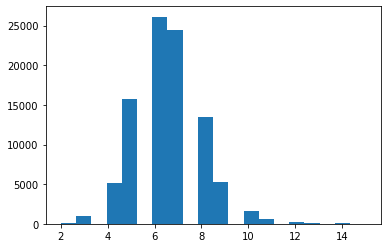

In [23]:
plt.hist(name_length, bins = 20)
plt.show()

In [24]:
from keras.preprocessing.sequence import pad_sequences

In [25]:
x = pad_sequences(df['Name'].values, maxlen=10, padding='pre')

In [26]:
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [27]:
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

In [28]:
vocab_size = len(vocab)+1
vocab_size

27

In [29]:
inp = Input(shape=(10, ))
emn = Embedding(input_dim=vocab_size, output_dim=5)(inp)

lstm1 = LSTM(units = 32, return_sequences=True)(emn)
lstm2 = LSTM(units=64)(lstm1)

out = Dense(units = 1, activation='sigmoid')(lstm2)
my_model = Model(inputs = inp, outputs = out)

In [30]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 10, 5)             135       
_________________________________________________________________
lstm (LSTM)                  (None, 10, 32)            4864      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 29,896
Trainable params: 29,896
Non-trainable params: 0
_________________________________________________________________


In [31]:
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [32]:
his = my_model.fit(x, y, epochs = 10, batch_size=256, validation_split=0.2)

Epoch 1/10
294/294 [==============================] - 16s 43ms/step - loss: 0.6106 - acc: 0.6871 - val_loss: 0.4142 - val_acc: 0.8153
Epoch 2/10
294/294 [==============================] - 11s 38ms/step - loss: 0.4178 - acc: 0.8035 - val_loss: 0.3983 - val_acc: 0.8169
Epoch 3/10
294/294 [==============================] - 11s 39ms/step - loss: 0.3954 - acc: 0.8159 - val_loss: 0.3979 - val_acc: 0.8138
Epoch 4/10
294/294 [==============================] - 11s 39ms/step - loss: 0.3940 - acc: 0.8144 - val_loss: 0.3892 - val_acc: 0.8197
Epoch 5/10
294/294 [==============================] - 11s 39ms/step - loss: 0.3866 - acc: 0.8201 - val_loss: 0.3839 - val_acc: 0.8253
Epoch 6/10
294/294 [==============================] - 11s 39ms/step - loss: 0.3825 - acc: 0.8199 - val_loss: 0.3797 - val_acc: 0.8263
Epoch 7/10
294/294 [==============================] - 11s 39ms/step - loss: 0.3844 - acc: 0.8208 - val_loss: 0.3733 - val_acc: 0.8272
Epoch 8/10
294/294 [==============================] - 11s 38ms

In [33]:
h = his.history

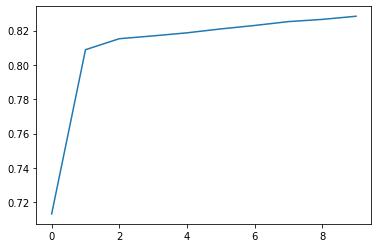

In [34]:
plt.plot(h['acc'])
plt.show()

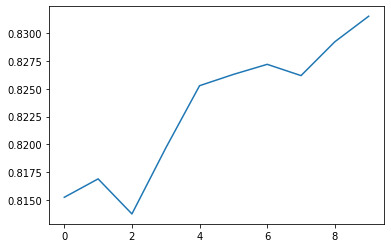

In [35]:
plt.plot(h['val_acc'])
plt.show()

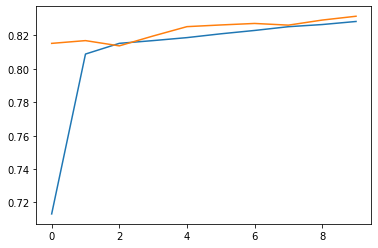

In [36]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.show()

In [37]:
name = 'Tom'
test_name = name.lower()

seq = [vocab[i] for i in test_name]
x_test = pad_sequences([seq], 10)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0, 20, 15, 13]], dtype=int32)

In [38]:
y_pred = my_model.predict(x_test)
y_pred

array([[0.728433]], dtype=float32)

In [39]:
#In Layman terms
y_pred = my_model.predict(x_test)
if y_pred<0.5:
  print('Female')
else:
  print('Male')

Male


In [40]:
# Single Time Name Execution To Predict
name = 'Ram'
test_name = name.lower()

seq = [vocab[i] for i in test_name]
x_test = pad_sequences([seq], 10)
x_test

y_pred = my_model.predict(x_test)
if y_pred<0.5:
  print('Female')
else:
  print('Male')

Male
